In [138]:
import pandas as pd 
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [84]:
from fbprophet import Prophet

In [70]:
df = pd.read_csv('Train_SU63ISt.csv')

In [60]:
test = pd.read_csv('Test_0qrQsBZ.csv')

In [61]:
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [71]:
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [72]:
df.tail()

,ID,Datetime,Count
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580
18287,18287,25-09-2014 23:00,534


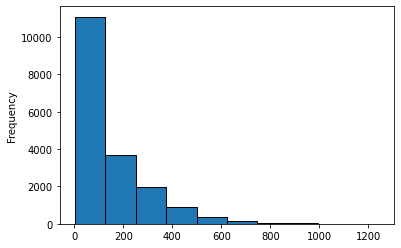

In [73]:
df.Count.plot(kind='hist', edgecolor='black')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


# Convert to date time format

In [75]:
df.Datetime = pd.to_datetime(df.Datetime,format='%d-%m-%Y %H:%M') 

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ID        18288 non-null  int64         
 1   Datetime  18288 non-null  datetime64[ns]
 2   Count     18288 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 428.8 KB


In [77]:
df.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


In [109]:
df.loc[df['ID'] == 12744]

,ID,Datetime,Count
12744,12744,2014-02-07,174


In [78]:
fb_forecast = df[['Datetime','Count']]

In [79]:
fb_forecast.head()

,Datetime,Count
0,2012-08-25 00:00:00,8
1,2012-08-25 01:00:00,2
2,2012-08-25 02:00:00,6
3,2012-08-25 03:00:00,2
4,2012-08-25 04:00:00,2


In [80]:

fb_forecast.columns = ['ds','y']

In [81]:
fb_forecast.head()

,ds,y
0,2012-08-25 00:00:00,8
1,2012-08-25 01:00:00,2
2,2012-08-25 02:00:00,6
3,2012-08-25 03:00:00,2
4,2012-08-25 04:00:00,2


In [110]:
split_date = '2014-02-07' 
pjme_train = fb_forecast.loc[fb_forecast.ds <= split_date].copy()
pjme_test = fb_forecast.loc[fb_forecast.ds > split_date].copy()

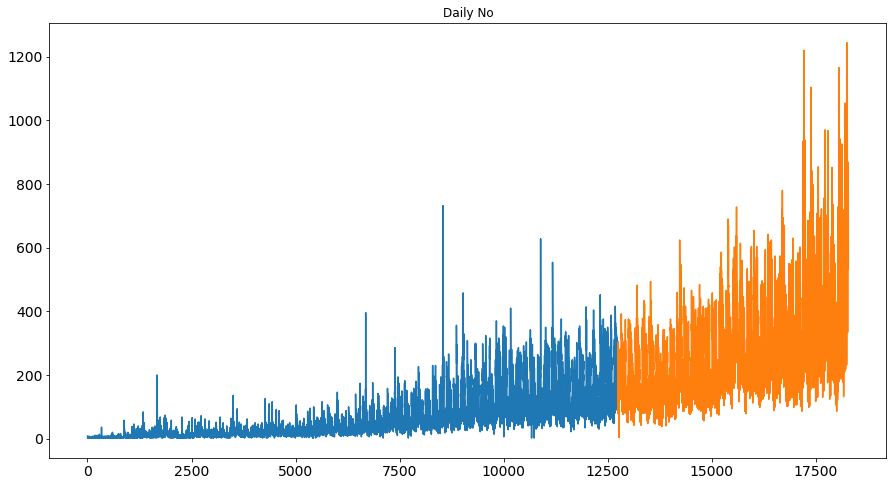

In [115]:
# Plot train and test so you can see where we have split
#Plotting data
pjme_train.y.plot(figsize=(15,8), title= 'Daily No', fontsize=14)
pjme_test.y.plot(figsize=(15,8), title= 'Daily No', fontsize=14)
plt.show()

In [119]:
m = Prophet(yearly_seasonality=True)


In [120]:
m.fit(pjme_train)


In [122]:
# Predict on test set with model
pjme_test_fcst = m.predict(df=pjme_test)

In [123]:
pjme_test_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-02-07 01:00:00,193.204762,143.742501,240.646392,193.204762,193.204762,-0.173306,-0.173306,-0.173306,-6.759813,-6.759813,-6.759813,10.292045,10.292045,10.292045,-3.705538,-3.705538,-3.705538,0.0,0.0,0.0,193.031456
1,2014-02-07 02:00:00,193.230475,133.041324,229.343265,193.230475,193.230475,-13.021287,-13.021287,-13.021287,-19.374417,-19.374417,-19.374417,10.051798,10.051798,10.051798,-3.698668,-3.698668,-3.698668,0.0,0.0,0.0,180.209188
2,2014-02-07 03:00:00,193.256188,123.919543,219.669107,193.256188,193.256188,-22.977572,-22.977572,-22.977572,-29.073033,-29.073033,-29.073033,9.787323,9.787323,9.787323,-3.691862,-3.691862,-3.691862,0.0,0.0,0.0,170.278616
3,2014-02-07 04:00:00,193.281901,116.124151,212.962698,193.281901,193.281901,-28.881678,-28.881678,-28.881678,-34.693596,-34.693596,-34.693596,9.497040,9.497040,9.497040,-3.685122,-3.685122,-3.685122,0.0,0.0,0.0,164.400224
4,2014-02-07 05:00:00,193.307614,112.715193,208.532897,193.307614,193.307614,-31.666392,-31.666392,-31.666392,-37.167176,-37.167176,-37.167176,9.179229,9.179229,9.179229,-3.678446,-3.678446,-3.678446,0.0,0.0,0.0,161.641222


In [132]:
pjme_test_fcst.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
5538,2014-09-25 19:00:00,335.602702,327.128389,436.320949,312.353560,357.968392,44.939336,44.939336,44.939336,21.085252,21.085252,21.085252,11.293416,11.293416,11.293416,12.560667,12.560667,12.560667,0.0,0.0,0.0,380.542038
5539,2014-09-25 20:00:00,335.628414,322.527900,430.208922,312.371316,357.998353,42.713432,42.713432,42.713432,18.982086,18.982086,18.982086,11.174218,11.174218,11.174218,12.557127,12.557127,12.557127,0.0,0.0,0.0,378.341847
5540,2014-09-25 21:00:00,335.654127,325.079852,430.931491,312.389072,358.028315,41.338975,41.338975,41.338975,17.748433,17.748433,17.748433,11.036924,11.036924,11.036924,12.553618,12.553618,12.553618,0.0,0.0,0.0,376.993102
5541,2014-09-25 22:00:00,335.679840,322.986700,429.717981,312.406829,358.058276,40.245306,40.245306,40.245306,16.814252,16.814252,16.814252,10.880915,10.880915,10.880915,12.550139,12.550139,12.550139,0.0,0.0,0.0,375.925146
5542,2014-09-25 23:00:00,335.705553,314.641229,424.978812,312.424585,358.088238,36.664492,36.664492,36.664492,13.412383,13.412383,13.412383,10.705418,10.705418,10.705418,12.546691,12.546691,12.546691,0.0,0.0,0.0,372.370045


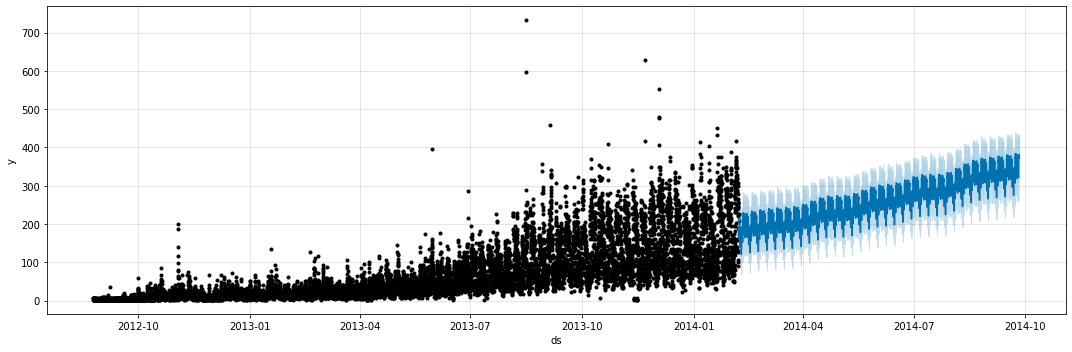

In [124]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = m.plot(pjme_test_fcst,
                 ax=ax)
plt.show()

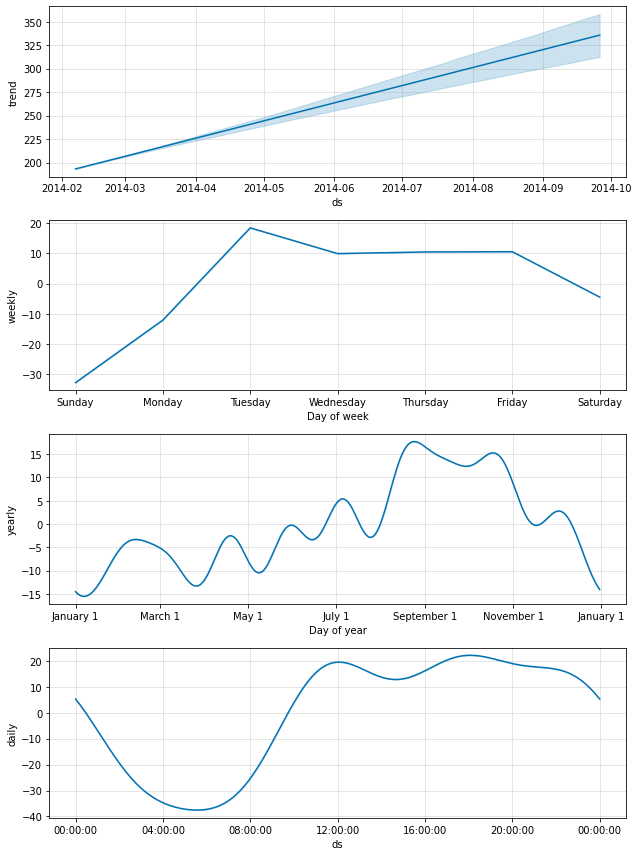

In [126]:
# Plot the components of the model
fig = m.plot_components(pjme_test_fcst)

# Compare Forecast to Actuals

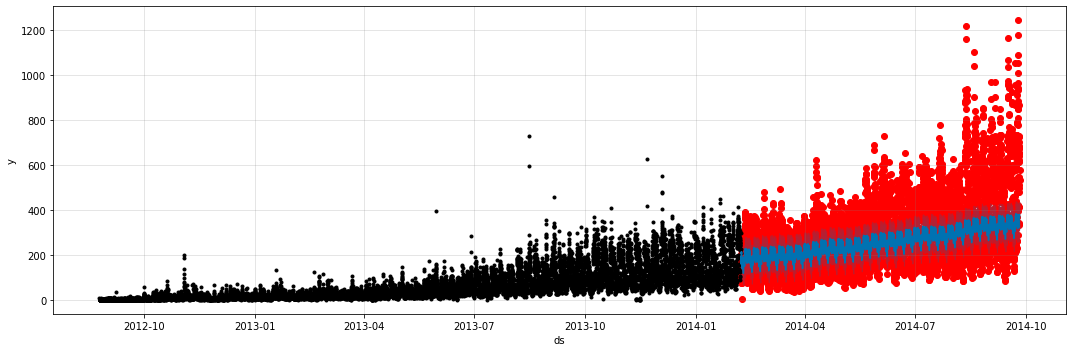

In [128]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(pjme_test.ds, pjme_test['y'], color='r')
fig = m.plot(pjme_test_fcst, ax=ax)

# Error Metrics

In [139]:
mean_squared_error(y_true=pjme_test['y'],
                   y_pred=pjme_test_fcst['yhat'])

17312.259550428684

In [140]:
from math import sqrt

In [141]:
rms = sqrt(mean_squared_error(y_true=pjme_test['y'],
                   y_pred=pjme_test_fcst['yhat']))

In [142]:
print(rms)

131.5760599441581


# Train the model on entire dataset

In [151]:
m = Prophet(yearly_seasonality=True)


In [152]:
m.fit(fb_forecast)


# Forecast on the test data on model trained on entire data

In [ ]:
# Predict on test set with model
pjme_test_fcst = m.predict(df=pjme_test)

In [153]:

pjme_test_fcst_Full_Data = m.predict(df=fb_test.reset_index() \
                                   .rename(columns={'Datetime':'ds'}))

In [154]:
pjme_test_fcst_Full_Data.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-10 00:00:00,150.502610,89.934393,273.452754,150.502610,150.502610,25.215700,25.215700,25.215700,5.315876,5.315876,5.315876,10.756231,10.756231,10.756231,9.143593,9.143593,9.143593,0.0,0.0,0.0,175.718310
1,2014-01-10 01:00:00,150.522161,63.110595,241.017233,150.522161,150.522161,2.636414,2.636414,2.636414,-17.129752,-17.129752,-17.129752,10.599849,10.599849,10.599849,9.166316,9.166316,9.166316,0.0,0.0,0.0,153.158575
2,2014-01-10 02:00:00,150.541712,42.295515,217.025960,150.541712,150.541712,-20.076873,-20.076873,-20.076873,-39.722194,-39.722194,-39.722194,10.456198,10.456198,10.456198,9.189123,9.189123,9.189123,0.0,0.0,0.0,130.464839
3,2014-01-10 03:00:00,150.561263,26.893776,198.040947,150.561263,150.561263,-37.720676,-37.720676,-37.720676,-57.250799,-57.250799,-57.250799,10.318110,10.318110,10.318110,9.212013,9.212013,9.212013,0.0,0.0,0.0,112.840587
4,2014-01-10 04:00:00,150.580814,10.291379,183.540082,150.580814,150.580814,-48.940775,-48.940775,-48.940775,-68.353456,-68.353456,-68.353456,10.177695,10.177695,10.177695,9.234986,9.234986,9.234986,0.0,0.0,0.0,101.640039


In [155]:
#save forecast 

df_save = pjme_test_fcst_Full_Data[['ds','yhat']]

In [157]:
df_save.to_csv('sample_submission.csv')

In [143]:
fb_test = test[['Datetime']]

In [144]:
fb_test

,Datetime
0,26-09-2014 00:00
1,26-09-2014 01:00
2,26-09-2014 02:00
3,26-09-2014 03:00
4,26-09-2014 04:00
5,26-09-2014 05:00
6,26-09-2014 06:00
7,26-09-2014 07:00
8,26-09-2014 08:00
9,26-09-2014 09:00


# Predict on training set with model (train test split)

In [145]:

pjme_test_fcst_1 = m.predict(df=fb_test.reset_index() \
                                   .rename(columns={'Datetime':'ds'}))

In [147]:
pjme_test_fcst_1.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-10 00:00:00,175.899993,128.601721,224.079836,175.899993,175.899993,0.530789,0.530789,0.530789,5.309709,5.309709,5.309709,10.509496,10.509496,10.509496,-15.288415,-15.288415,-15.288415,0.0,0.0,0.0,176.430782
1,2014-01-10 01:00:00,175.925706,113.331836,216.382106,175.925706,175.925706,-11.749539,-11.749539,-11.749539,-6.759813,-6.759813,-6.759813,10.292045,10.292045,10.292045,-15.281771,-15.281771,-15.281771,0.0,0.0,0.0,164.176167
2,2014-01-10 02:00:00,175.951419,100.508081,198.590733,175.951419,175.951419,-24.597656,-24.597656,-24.597656,-19.374417,-19.374417,-19.374417,10.051798,10.051798,10.051798,-15.275037,-15.275037,-15.275037,0.0,0.0,0.0,151.353763
3,2014-01-10 03:00:00,175.977132,90.701088,187.776843,175.977132,175.977132,-34.553922,-34.553922,-34.553922,-29.073033,-29.073033,-29.073033,9.787323,9.787323,9.787323,-15.268212,-15.268212,-15.268212,0.0,0.0,0.0,141.423210
4,2014-01-10 04:00:00,176.002845,87.445705,186.630840,176.002845,176.002845,-40.457853,-40.457853,-40.457853,-34.693596,-34.693596,-34.693596,9.497040,9.497040,9.497040,-15.261297,-15.261297,-15.261297,0.0,0.0,0.0,135.544992


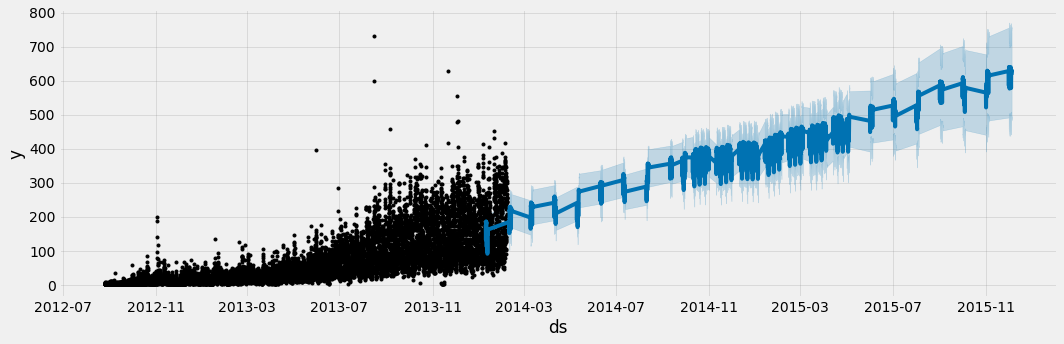

In [149]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = m.plot(pjme_test_fcst_1,
                 ax=ax)
plt.show()

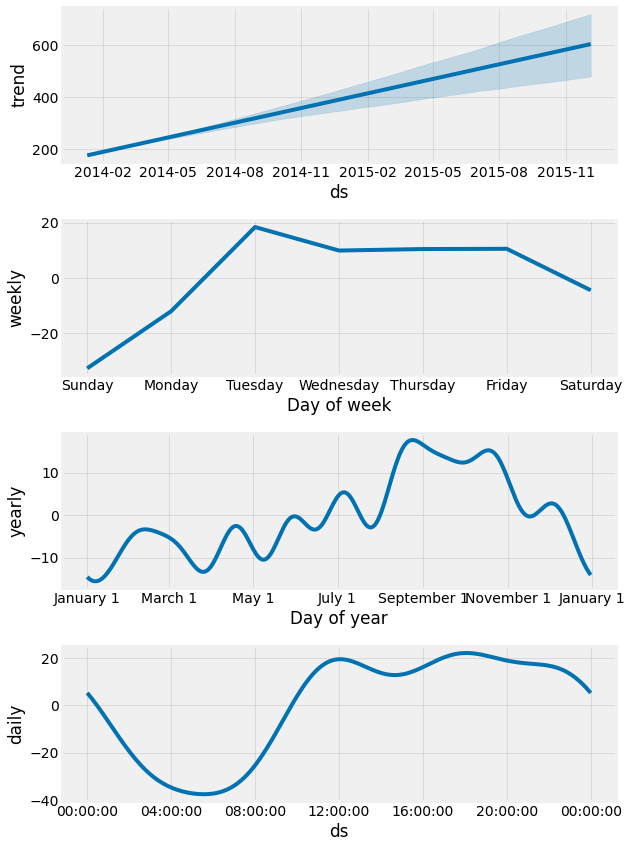

In [150]:
# Plot the components of the model
fig = m.plot_components(pjme_test_fcst_1)